## Train a Supervised Learning model, processes the CSV file, and scores the model. You will need to identify the two features that most effectively train the model.

In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import io
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("ToyotaCorollaWithTargetColumn09.csv")

In [3]:
data.head()

,Unnamed: 0,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Wrecked
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,...,1,0,0,0,1,0,0,0,0,0
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,...,1,0,0,0,1,0,0,0,0,0
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,...,1,0,0,0,1,0,0,0,0,0
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,...,1,0,0,0,1,0,0,0,0,0
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,...,1,0,1,0,1,0,0,0,0,0


In [4]:
data.describe()

,Unnamed: 0,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Wrecked
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,717.500000,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,...,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855,0.389276
std,414.681806,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,...,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098,0.487756
min,0.000000,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,358.750000,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,717.500000,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1076.250000,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1435.000000,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.isnull().sum()

Unnamed: 0           0
Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
Wrecked              0
dtype: int64

In [6]:
data.columns

Index(['Unnamed: 0', 'Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month',
       'Mfg_Year', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic',
       'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight',
       'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar', 'Wrecked'],
      dtype='object')

In [7]:
data = data.drop(['Id','Unnamed: 0'],axis =1)

In [8]:
print(data.dtypes)

Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim          int64
Radio_cassette      

In [9]:
data.nunique()

Model                 319
Price                 236
Age_08_04              77
Mfg_Month              12
Mfg_Year                7
KM                   1263
Fuel_Type               3
HP                     12
Met_Color               2
Color                  10
Automatic               2
CC                     13
Doors                   4
Cylinders               1
Gears                   4
Quarterly_Tax          13
Weight                 59
Mfr_Guarantee           2
BOVAG_Guarantee         2
Guarantee_Period        9
ABS                     2
Airbag_1                2
Airbag_2                2
Airco                   2
Automatic_airco         2
Boardcomputer           2
CD_Player               2
Central_Lock            2
Powered_Windows         2
Power_Steering          2
Radio                   2
Mistlamps               2
Sport_Model             2
Backseat_Divider        2
Metallic_Rim            2
Radio_cassette          2
Parking_Assistant       2
Tow_Bar                 2
Wrecked     

In [10]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["Color_code"] = ord_enc.fit_transform(data[["Color"]])
data["Fuel_Type_code"] = ord_enc.fit_transform(data[["Fuel_Type"]])
data[["Color_code", "Color", "Fuel_Type_code", "Fuel_Type"]].head()

,Color_code,Color,Fuel_Type_code,Fuel_Type
0,2.0,Blue,1.0,Diesel
1,6.0,Silver,1.0,Diesel
2,2.0,Blue,1.0,Diesel
3,1.0,Black,1.0,Diesel
4,1.0,Black,1.0,Diesel


In [11]:
data = data.drop(['Color','Fuel_Type', 'Model'],axis =1)

In [12]:
data.shape

(1436, 38)

In [13]:
print(data.groupby('Wrecked').size())

Wrecked
0    877
1    559
dtype: int64


<AxesSubplot:>

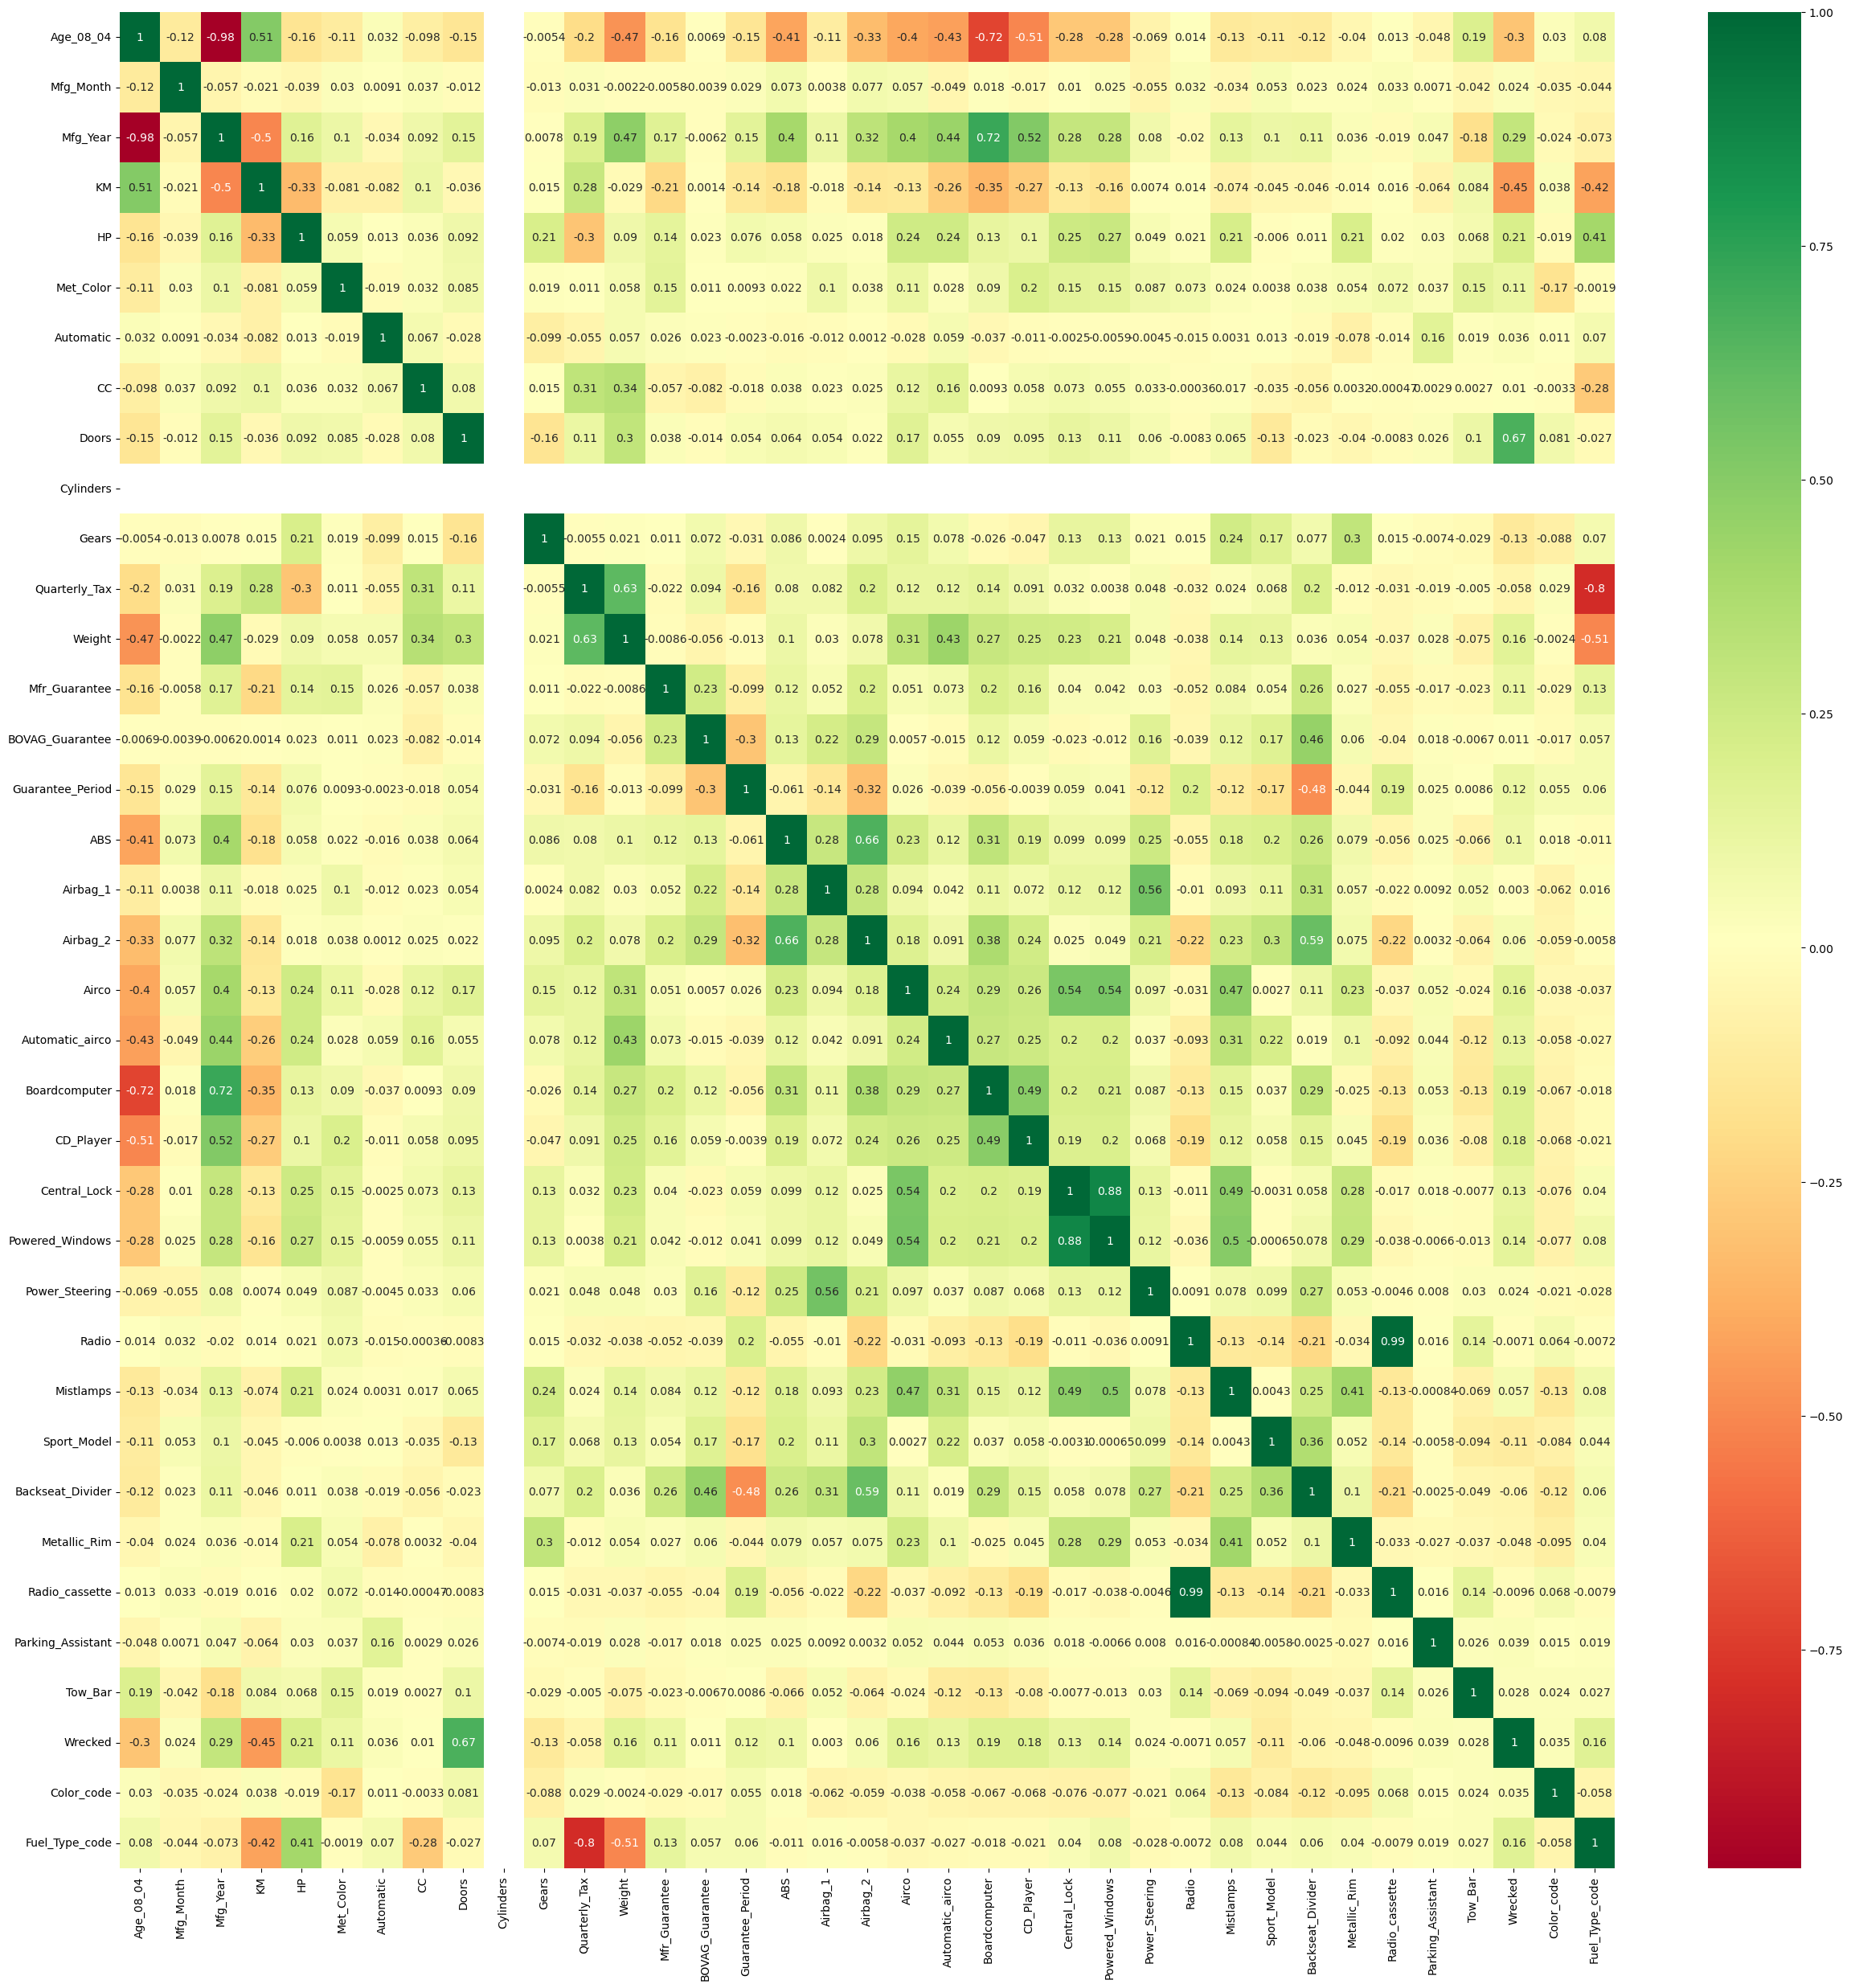

In [14]:
plt.figure(figsize = (30,30))
df = data.iloc[:,1:].corr()
sns.heatmap(df,annot = True,cmap = "RdYlGn")

In [15]:
df=data.loc[:, data.columns != 'Wrecked']
df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Color_code,Fuel_Type_code
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,2.0,1.0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,6.0,1.0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,2.0,1.0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1.0,1.0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,0,2.0,2.0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,0,4.0,2.0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,0,2.0,2.0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,0,4.0,2.0


In [16]:
x = df
y = data.Wrecked

In [17]:
y.shape

(1436,)

In [18]:
x.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Color_code,Fuel_Type_code
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,2.0,1.0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,6.0,1.0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,2.0,1.0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1.0,1.0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1.0,1.0


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Wrecked, dtype: int64

In [20]:
feature_label = x.columns

In [21]:
feature_label

Index(['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color',
       'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar', 'Color_code',
       'Fuel_Type_code'],
      dtype='object')

In [22]:
cor = data.corr()
cor_target = abs(cor["Wrecked"])

In [23]:
cor_target.sort_values(ascending=False)

Wrecked              1.000000
Doors                0.670831
KM                   0.447111
Price                0.337900
Age_08_04            0.295991
Mfg_Year             0.293427
HP                   0.206694
Boardcomputer        0.185907
CD_Player            0.178873
Fuel_Type_code       0.163696
Weight               0.162656
Airco                0.156636
Powered_Windows      0.143513
Central_Lock         0.129449
Gears                0.127270
Automatic_airco      0.126714
Guarantee_Period     0.116326
Sport_Model          0.111491
Mfr_Guarantee        0.110676
Met_Color            0.109122
ABS                  0.100169
Airbag_2             0.060409
Backseat_Divider     0.059541
Quarterly_Tax        0.058065
Mistlamps            0.056733
Metallic_Rim         0.047596
Parking_Assistant    0.039101
Automatic            0.036477
Color_code           0.035034
Tow_Bar              0.027672
Mfg_Month            0.023961
Power_Steering       0.023772
BOVAG_Guarantee      0.011167
CC        

In [24]:
relevant_features = cor_target[cor_target>0.4]
relevant_features

KM         0.447111
Doors      0.670831
Wrecked    1.000000
Name: Wrecked, dtype: float64

In [25]:
x = x.loc[:, ["KM","Doors"]]

In [26]:
x

,KM,Doors
0,46986,3
1,72937,3
2,41711,3
3,48000,3
4,38500,3
...,...,...
1431,20544,3
1432,19000,3
1433,17016,3
1434,16916,3


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [30]:
from sklearn import metrics

In [31]:
y_insample = log_reg.predict(x_train)

In [32]:
from sklearn.metrics import accuracy_score , confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

In [33]:
acc_insample = accuracy_score(y_train,y_insample)
auc_insample = roc_auc_score(y_train, y_insample)
f1_insample = f1_score(y_train, y_insample)
precision_insample = precision_score(y_train,y_insample)
recall_insample = recall_score(y_train, y_insample)

In [34]:
insample_log = pd.DataFrame([['logistic_reg in sample',acc_insample,auc_insample,f1_insample,precision_insample,recall_insample]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
insample_log

,Model,Accuracy,AUC,F1,Precision,Recall
0,logistic_reg in sample,0.825784,0.825444,0.792961,0.764471,0.823656


In [35]:
y_lr = log_reg.predict(x_test)

In [36]:
acc_lr = accuracy_score(y_test,y_lr)
auc_lr = roc_auc_score(y_test, y_lr)
f1_lr = f1_score(y_test, y_lr)
precision_lr = precision_score(y_test,y_lr)
recall_lr = recall_score(y_test, y_lr)

In [37]:
log = pd.DataFrame([['logistic_reg out of sample',acc_lr,auc_lr,f1_lr,precision_lr,recall_lr]],
                           columns = ['Model','Accuracy','AUC','F1','Precision','Recall'])
log

,Model,Accuracy,AUC,F1,Precision,Recall
0,logistic_reg out of sample,0.8125,0.819697,0.745283,0.669492,0.840426


In [38]:
pd.concat([insample_log,log])

,Model,Accuracy,AUC,F1,Precision,Recall
0,logistic_reg in sample,0.825784,0.825444,0.792961,0.764471,0.823656
0,logistic_reg out of sample,0.812500,0.819697,0.745283,0.669492,0.840426
